## Cardiovascular Disease dataset

## Behandling av data inför analys

In [32]:
import kagglehub
import pandas as pd
# Ladda ner senaste versionen av datasetet
path = kagglehub.dataset_download("sulianova/cardiovascular-disease-dataset")



# Läs in datasetet
df = pd.read_csv(f'{path}/cardio_train.csv', sep=';')

# Visa de första raderna för att kontrollera att det lästs in korrekt
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [33]:
# Identifiera och ta bort felaktiga blodtryck
df = df[(df["ap_hi"] > 0) & (df["ap_lo"] > 0)]  # Ta bort negativa blodtryck
df = df[(df["ap_hi"] < 300) & (df["ap_lo"] < 300)]  # Ta bort omöjligt höga blodtryck

# Kontrollera antalet kvarvarande poster
print(f"Antal kvarvarande poster efter rensning: {len(df)}")

Antal kvarvarande poster efter rensning: 68985


## EDA

In [34]:
# 1. Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
positiva = df[df["cardio"] == 1].shape[0]
negativa = df[df["cardio"] == 0].shape[0]

print(f"Antal positiva för hjärt-kärlsjukdom: {positiva}")
print(f"Antal negativa för hjärt-kärlsjukdom: {negativa}")

Antal positiva för hjärt-kärlsjukdom: 34141
Antal negativa för hjärt-kärlsjukdom: 34844


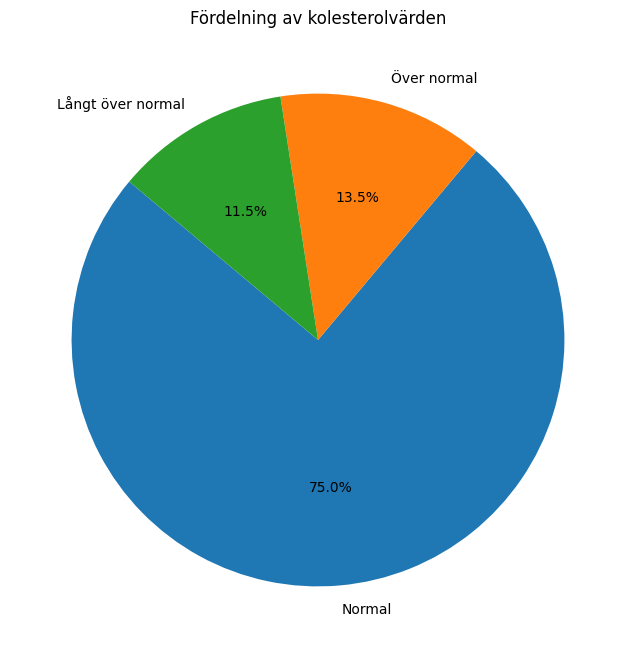

In [35]:
# 2. Hur stor andel har normala, över normala och långt över normala kolesterolvärden?

import matplotlib.pyplot as plt

# Kategorisera kolesterolvärden
def kategorisera_kolesterol(kolesterol):
    if kolesterol == 1:
        return "Normal"
    elif kolesterol == 2:
        return "Över normal"
    elif kolesterol == 3:
        return "Långt över normal"
    else:
        return "Okänd"

# Applicera kategorisering på datasetet
df["kolesterol_kategori"] = df["cholesterol"].apply(kategorisera_kolesterol)

# Beräkna andelen för varje kategori
andelar = df["kolesterol_kategori"].value_counts(normalize=True) * 100

# Rita tårtdiagram
plt.figure(figsize=(8, 8))
plt.pie(andelar, labels=andelar.index, autopct="%1.1f%%", startangle=140)
plt.title("Fördelning av kolesterolvärden")
plt.show()

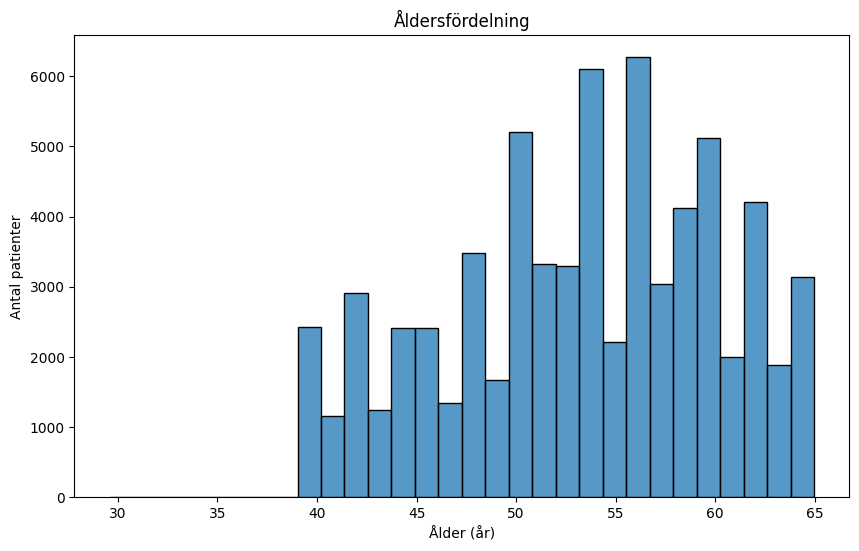

In [36]:
# 3. Hur ser åldersfördelningen ut? 

import seaborn as sns

# Rita histogram för åldersfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["age"] / 365, bins=30)  # Konvertera ålder från dagar till år
plt.title("Åldersfördelning")
plt.xlabel("Ålder (år)")
plt.ylabel("Antal patienter")
plt.show()

In [37]:
# 4. Hur stor andel röker? 

# Beräkna andelen som röker
andel_roker = df["smoke"].mean() * 100 # Beräknar medelvärdet av kolumnen smoke, där 1 indikerar rökare och 0 icke-rökare.

print(f"Andel som röker: {andel_roker:.2f}%")

Andel som röker: 8.79%


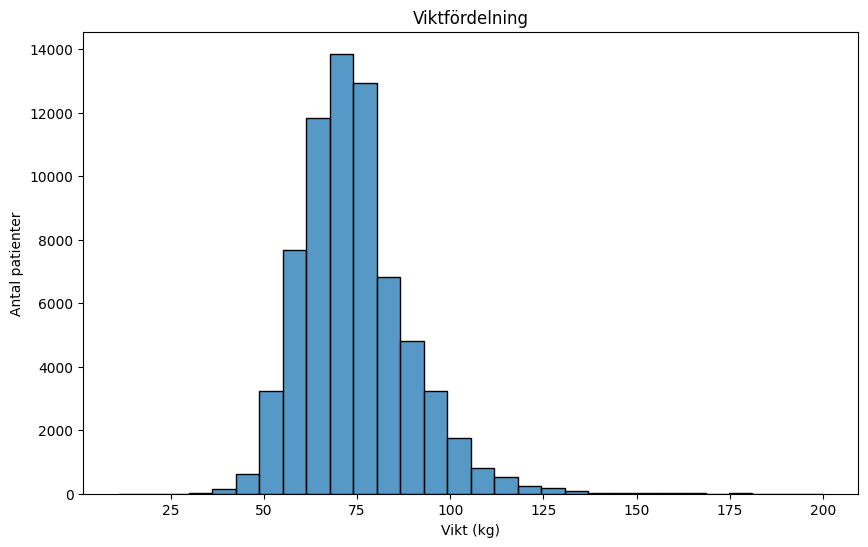

In [38]:
# 5. Hur ser viktfördelningen ut? 

# Rita histogram för viktfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["weight"], bins=30)
plt.title("Viktfördelning")
plt.xlabel("Vikt (kg)")
plt.ylabel("Antal patienter")
plt.show()

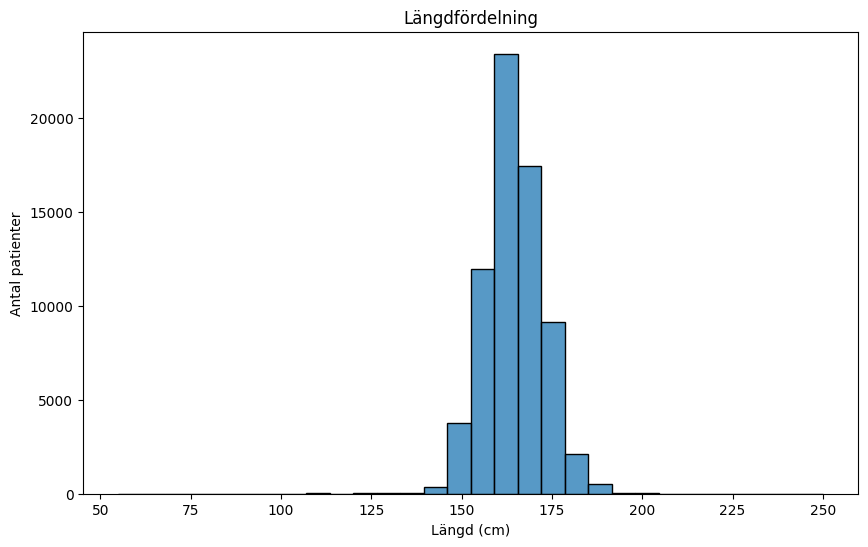

In [39]:
# 6. Hur ser längdfördelningen ut? 

# Rita histogram för längdfördelningen
plt.figure(figsize=(10, 6))
sns.histplot(df["height"], bins=30)
plt.title("Längdfördelning")
plt.xlabel("Längd (cm)")
plt.ylabel("Antal patienter")
plt.show()

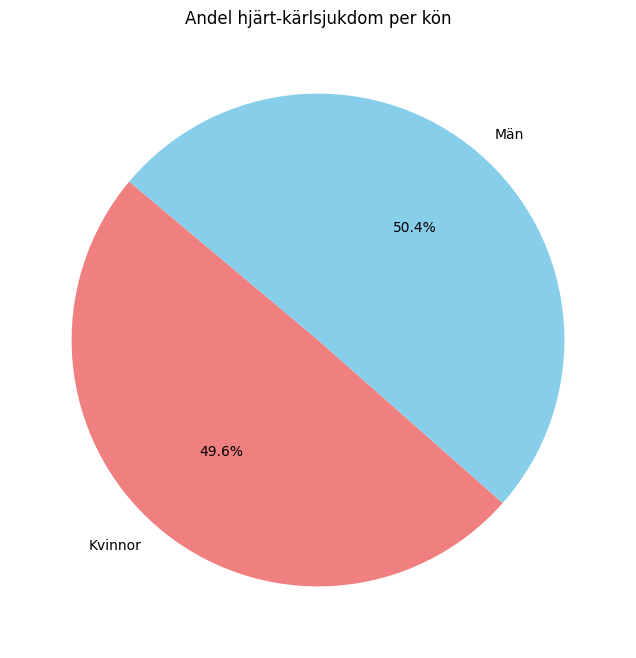

In [40]:
# 7. Hur stor andel av kvinnor respektive män har hjärt och kärlsjukdom? 

# Beräkna andelen hjärt-kärlsjukdom per kön
sjukdom_per_kon = df.groupby("gender")["cardio"].mean() * 100

# Skapa etiketter för kön
kon_etiketter = ["Kvinnor", "Män"]

# Rita tårtdiagram
plt.figure(figsize=(8, 8))
plt.pie(sjukdom_per_kon, labels=kon_etiketter, autopct="%1.1f%%", startangle=140, colors=["lightcoral", "skyblue"])
plt.title("Andel hjärt-kärlsjukdom per kön")
plt.show()

In [41]:
# Beräkna andelen hjärt-kärlsjukdom per kön
sjukdom_per_kon = df.groupby("gender")["cardio"].mean() * 100

# Skapa etiketter för kön
kon_etiketter = ["Kvinnor", "Män"]

# Visa resultatet
for kon, andel in zip(kon_etiketter, sjukdom_per_kon):
    print(f"Andel hjärt-kärlsjukdom för {kon}: {andel:.2f}%")

Andel hjärt-kärlsjukdom för Kvinnor: 49.21%
Andel hjärt-kärlsjukdom för Män: 50.01%


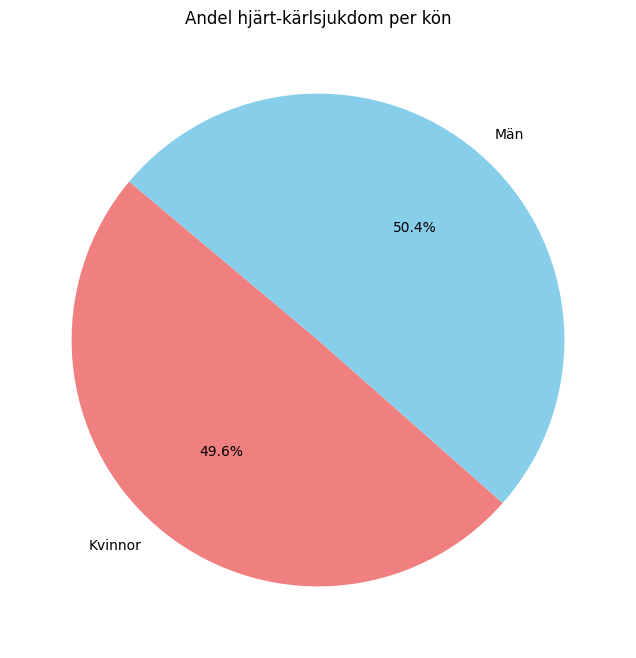

In [47]:
import matplotlib.pyplot as plt

# Beräkna andelen hjärt-kärlsjukdom per kön
sjukdom_per_etikett = df.groupby("gender")["cardio"].mean() * 100

# Skapa etiketter för kön
etiketter = ["Kvinnor", "Män"]

# Rita tårtdiagram
plt.figure(figsize=(8, 8))
plt.pie(sjukdom_per_etikett, labels=etiketter, autopct="%1.1f%%", startangle=140, colors=["lightcoral", "skyblue"])
plt.title("Andel hjärt-kärlsjukdom per kön")
plt.show()